In [1]:
import pandas as pd
import numpy as np

In [2]:
#read the files
train=pd.read_csv("C:/Users/kallol/Desktop/Kaggle/Hackathon/train.csv")
test=pd.read_csv("C:/Users/kallol/Desktop/Kaggle/Hackathon/test.csv")

In [3]:
train.Left.head()

0    1
1    0
2    1
3    1
4    0
Name: Left, dtype: int64

In [4]:
#dropping customer id from train data as this is not usefull for prediction
train=train.drop('Customer_Id',axis=1)

In [5]:
test.head()

,Customer_Id,�..gross_income,avg_monthly_minute_usage,repeating.charge,avg_assisted_calls,avg_overage_min_use,avg_roaming_calls,per_change_min_use,per_change_gross_profit,avg_drop_voice_call,...,is_married,is_online_purchaser,mail_active,frequent_traveller,access_to_pc,credit_card,is_referral_made,income,access_twowheeler,credit_rating_up_down
0,19073,116.08,1000.50,34.98,1.98,245.25,5.2,-149.50,-40.88,19.67,...,0,0,0,0,0,1,0,3,0,0
1,61023,65.99,904.75,54.99,0.25,55.00,0.0,189.25,-21.00,6.00,...,1,0,0,0,0,1,1,6,0,0
2,42451,76.65,361.75,38.12,0.00,0.00,0.0,-361.75,73.35,17.67,...,0,0,0,0,0,1,0,1,0,0
3,61656,73.81,498.50,33.16,0.00,12.75,0.0,-430.50,76.19,21.33,...,0,0,0,0,0,0,0,0,0,0
4,67593,25.65,129.00,9.74,0.00,24.00,0.0,-90.00,-15.65,0.67,...,1,1,1,0,1,1,0,1,0,0


In [6]:
#dropping customer id from test data 
test=test.drop('Customer_Id',axis=1)

In [7]:
#finding number of missing value column wise from the train data
total=train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Total>0]

,Total,Percent
age,927,0.01854
per_change_gross_profit,362,0.00724
per_change_min_use,362,0.00724
avg_monthly_minute_usage,160,0.00320
repeating.charge,160,0.00320
avg_assisted_calls,160,0.00320
avg_overage_min_use,160,0.00320
avg_roaming_calls,160,0.00320
�..gross_income,160,0.00320


In [8]:
##finding number of missing value column wise from the test data
total=test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Total>0]

,Total,Percent
age,317,0.015062
per_change_gross_profit,140,0.006652
per_change_min_use,140,0.006652
avg_monthly_minute_usage,56,0.002661
repeating.charge,56,0.002661
avg_assisted_calls,56,0.002661
avg_overage_min_use,56,0.002661
avg_roaming_calls,56,0.002661
�..gross_income,56,0.002661
handset,1,0.000048


In [9]:
#displaying the datatypes of each column
train.dtypes

�..gross_income             float64
avg_monthly_minute_usage    float64
repeating.charge            float64
avg_assisted_calls          float64
avg_overage_min_use         float64
avg_roaming_calls           float64
per_change_min_use          float64
per_change_gross_profit     float64
avg_drop_voice_call         float64
ag_block_voice_call         float64
avg_unans_voice_call        float64
avg_custmore_care_call      float64
avg_threeway_call           float64
mou_rec                     float64
avg_outbound_voice_call     float64
avg_incalls                 float64
avg_peakvoice               float64
avg_off_peakvoice           float64
avg_drop_block              float64
avg_call_forwarding         float64
avg_callwait                float64
months                        int64
unique_sub                    int64
active_sub                    int64
handset                       int64
model                         int64
equip_days                    int64
age                         

In [10]:
#the column name is written on ascii character, changing it to english word
train.rename(columns={'\xef..gross_income':'gross_income'}, inplace=True)

In [11]:
test.rename(columns={'\xef..gross_income':'gross_income'}, inplace=True)

In [12]:
#changing the dot to underscore in column name it may create some problem beause dot is used to call object
train.rename(columns={'repeating.charge':'repeating_charge'}, inplace=True)

In [13]:
test.rename(columns={'repeating.charge':'repeating_charge'}, inplace=True)

In [14]:
#creating a seperate dataset from train data without null values
notnull= train[train.age.notnull()]
notnull= notnull[train.per_change_gross_profit.notnull()]
notnull= notnull[train.per_change_min_use.notnull()]
notnull= notnull[train.avg_monthly_minute_usage.notnull()] 
notnull= notnull[train.repeating_charge.notnull() ]
notnull= notnull[train.avg_assisted_calls.notnull() ]
notnull= notnull[train.avg_overage_min_use.notnull()] 
notnull= notnull[train.avg_roaming_calls.notnull() ]
notnull= notnull[train.gross_income.notnull()]

C:\Users\kallol\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kallol\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\kallol\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\kallol\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\kallol\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\kallol\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match Dat

In [15]:
from collections import Counter

In [16]:
#displaying first five row of newly formed dataset
#as we know we have very less number of null data compared to the train dataset we can ignore them for further model building
notnull.head()

,gross_income,avg_monthly_minute_usage,repeating_charge,avg_assisted_calls,avg_overage_min_use,avg_roaming_calls,per_change_min_use,per_change_gross_profit,avg_drop_voice_call,ag_block_voice_call,...,is_online_purchaser,mail_active,frequent_traveller,access_to_pc,credit_card,is_referral_made,income,access_twowheeler,credit_rating_up_down,Left
0,44.08,430.00,50.07,0.00,10.25,0.0,-47.00,-4.09,0.00,0.00,...,0,0,0,0,1,0,6,0,0,1
1,30.50,86.00,30.00,0.50,0.00,0.0,-46.00,-0.49,1.33,0.00,...,0,0,0,0,0,0,0,0,0,0
2,30.65,65.50,29.99,0.00,0.75,0.0,4.50,-0.66,0.00,2.00,...,1,1,0,1,1,0,5,0,0,1
3,34.99,425.25,44.99,0.00,0.00,0.0,34.75,0.00,5.00,1.33,...,0,0,0,0,1,0,3,0,0,1
4,170.75,1657.25,61.69,1.73,458.75,0.0,-1654.25,-178.98,14.67,1.00,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#we need to seperate numerical data and categorical data for feature engineering, we are seperating them
#all categorical variables having category less than 23
cat=[]
num=[]
for i in range(0,55):
    if(len(Counter(notnull.iloc[:,i]))<23):
        cat.append(i)
    else:
        num.append(i)

In [18]:
#storing categorical and numerical feature names 
categorial_features = notnull.iloc[:,cat].columns.values
numeric_features = notnull.iloc[:,num].columns.values

#creating different detasets for numerical and categorical data
categorial = notnull.iloc[:,cat]
numerical = notnull.iloc[:,num]

In [19]:
#printing categorical and numeric column names
print categorial_features
print numeric_features

['unique_sub' 'active_sub' 'handset' 'model' 'children' 'CR.A' 'CR.AA'
 'CR.B' 'CR.C' 'CR.DE' 'is_rural' 'is_subUrban' 'is_town' 'HS_refurb'
 'HS.web_enable' 'emp_level.C' 'is_student' 'is_housemaker' 'is_retired'
 'is_selfEmployed' 'is_house_rented' 'is_married' 'is_online_purchaser'
 'mail_active' 'frequent_traveller' 'access_to_pc' 'credit_card'
 'is_referral_made' 'income' 'access_twowheeler' 'credit_rating_up_down']
['gross_income' 'avg_monthly_minute_usage' 'repeating_charge'
 'avg_assisted_calls' 'avg_overage_min_use' 'avg_roaming_calls'
 'per_change_min_use' 'per_change_gross_profit' 'avg_drop_voice_call'
 'ag_block_voice_call' 'avg_unans_voice_call' 'avg_custmore_care_call'
 'avg_threeway_call' 'mou_rec' 'avg_outbound_voice_call' 'avg_incalls'
 'avg_peakvoice' 'avg_off_peakvoice' 'avg_drop_block' 'avg_call_forwarding'
 'avg_callwait' 'months' 'equip_days' 'age']


In [20]:
#checking numerical dataset
numerical.head()

,gross_income,avg_monthly_minute_usage,repeating_charge,avg_assisted_calls,avg_overage_min_use,avg_roaming_calls,per_change_min_use,per_change_gross_profit,avg_drop_voice_call,ag_block_voice_call,...,avg_outbound_voice_call,avg_incalls,avg_peakvoice,avg_off_peakvoice,avg_drop_block,avg_call_forwarding,avg_callwait,months,equip_days,age
0,44.08,430.00,50.07,0.00,10.25,0.0,-47.00,-4.09,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,8,243,62.0
1,30.50,86.00,30.00,0.50,0.00,0.0,-46.00,-0.49,1.33,0.00,...,11.33,0.67,34.67,20.33,1.33,0.0,0.00,25,736,0.0
2,30.65,65.50,29.99,0.00,0.75,0.0,4.50,-0.66,0.00,2.00,...,5.33,0.33,17.67,10.67,2.00,0.0,0.00,21,634,32.0
3,34.99,425.25,44.99,0.00,0.00,0.0,34.75,0.00,5.00,1.33,...,16.67,5.33,51.33,93.67,6.33,0.0,0.67,11,305,32.0
4,170.75,1657.25,61.69,1.73,458.75,0.0,-1654.25,-178.98,14.67,1.00,...,118.33,50.33,665.67,400.33,15.67,0.0,35.67,23,132,0.0


In [21]:
#importing libraries for ploting 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

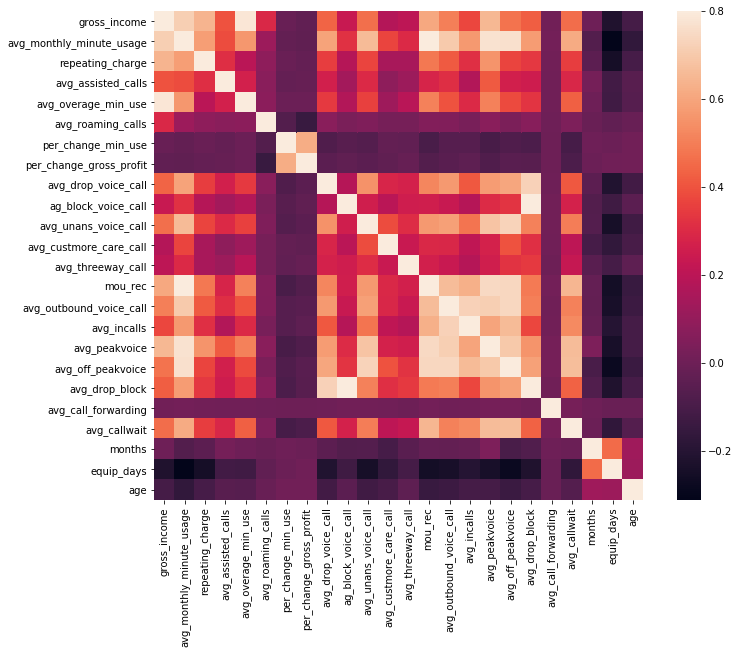

In [22]:
#displaying correlation matrix for all numeric features to get an idea about what item to keep and what item to drop
corrmat = numerical.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [23]:
#creating a function that will detect and delete colums which are corrrelated with each other
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
                    print colname

    #print(dataset)

In [24]:
numerical.head()

,gross_income,avg_monthly_minute_usage,repeating_charge,avg_assisted_calls,avg_overage_min_use,avg_roaming_calls,per_change_min_use,per_change_gross_profit,avg_drop_voice_call,ag_block_voice_call,...,avg_outbound_voice_call,avg_incalls,avg_peakvoice,avg_off_peakvoice,avg_drop_block,avg_call_forwarding,avg_callwait,months,equip_days,age
0,44.08,430.00,50.07,0.00,10.25,0.0,-47.00,-4.09,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,8,243,62.0
1,30.50,86.00,30.00,0.50,0.00,0.0,-46.00,-0.49,1.33,0.00,...,11.33,0.67,34.67,20.33,1.33,0.0,0.00,25,736,0.0
2,30.65,65.50,29.99,0.00,0.75,0.0,4.50,-0.66,0.00,2.00,...,5.33,0.33,17.67,10.67,2.00,0.0,0.00,21,634,32.0
3,34.99,425.25,44.99,0.00,0.00,0.0,34.75,0.00,5.00,1.33,...,16.67,5.33,51.33,93.67,6.33,0.0,0.67,11,305,32.0
4,170.75,1657.25,61.69,1.73,458.75,0.0,-1654.25,-178.98,14.67,1.00,...,118.33,50.33,665.67,400.33,15.67,0.0,35.67,23,132,0.0


In [25]:
#getting the name of those variables having correlation more than 0.75
correlation(numerical,0.75)

avg_overage_min_use
mou_rec
avg_peakvoice
avg_off_peakvoice
avg_drop_block


In [26]:
#deleting those variable(correlated with each other)

train=train.drop('avg_overage_min_use',axis=1)
train=train.drop('mou_rec',axis=1)
train=train.drop('avg_peakvoice',axis=1)
train=train.drop('avg_off_peakvoice',axis=1)
train=train.drop('avg_drop_block',axis=1)

In [27]:
#doing the same for test data
test=test.drop('avg_overage_min_use',axis=1)
test=test.drop('mou_rec',axis=1)
test=test.drop('avg_peakvoice',axis=1)
test=test.drop('avg_off_peakvoice',axis=1)
test=test.drop('avg_drop_block',axis=1)

In [28]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 14,10 # Big graphs unless specified
sns.set(color_codes=True) # Set style and color of graphs

C:\Users\kallol\Anaconda2\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


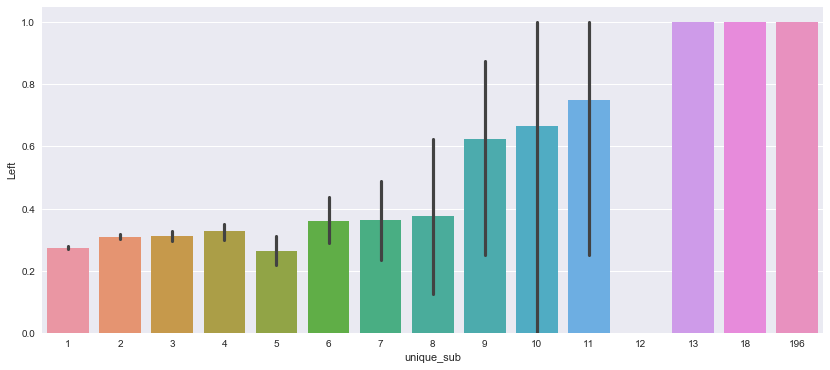

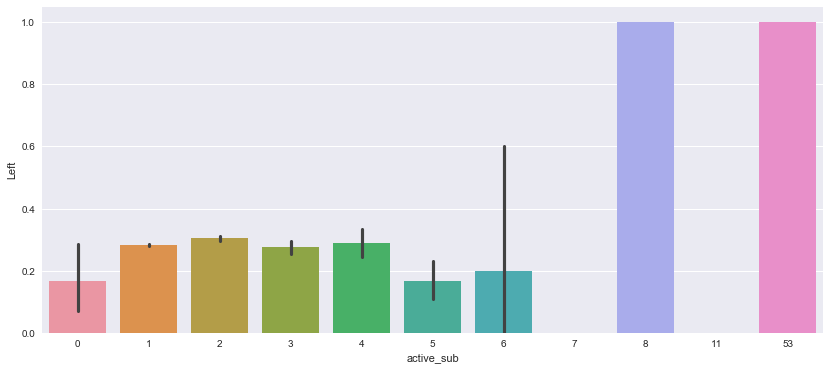

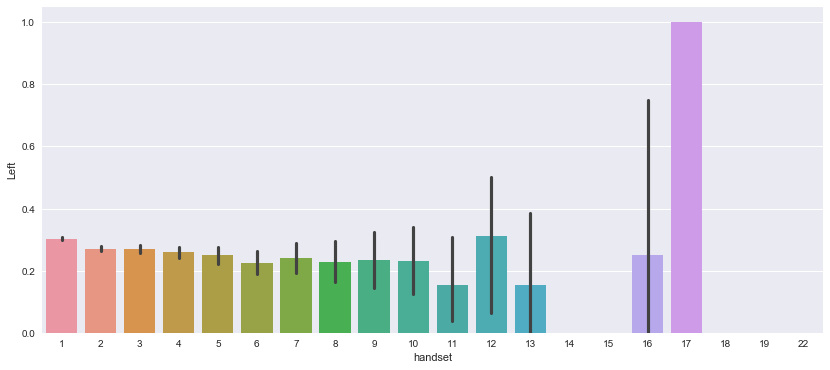

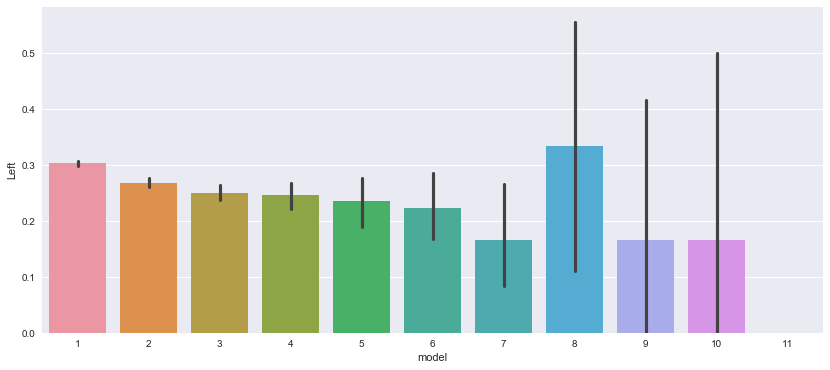

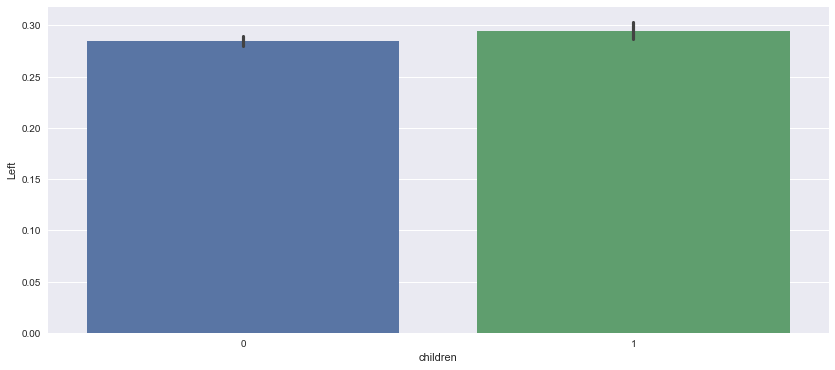

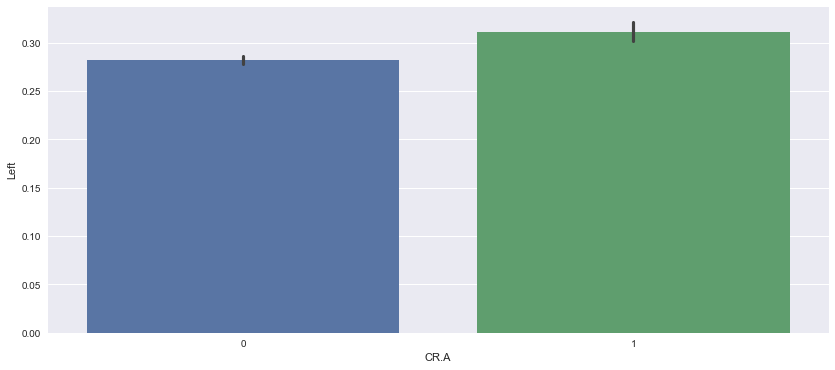

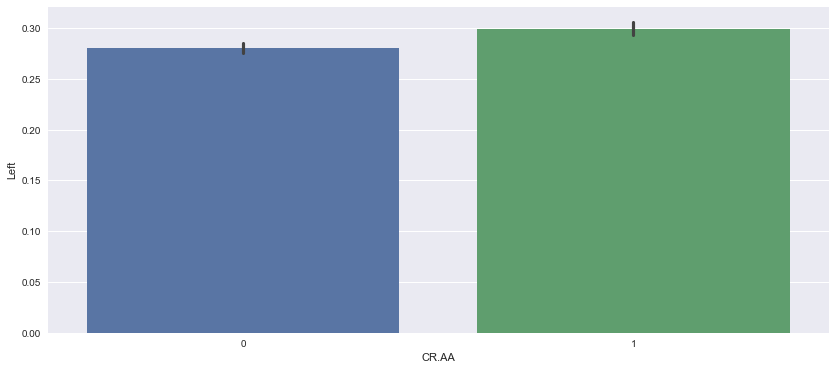

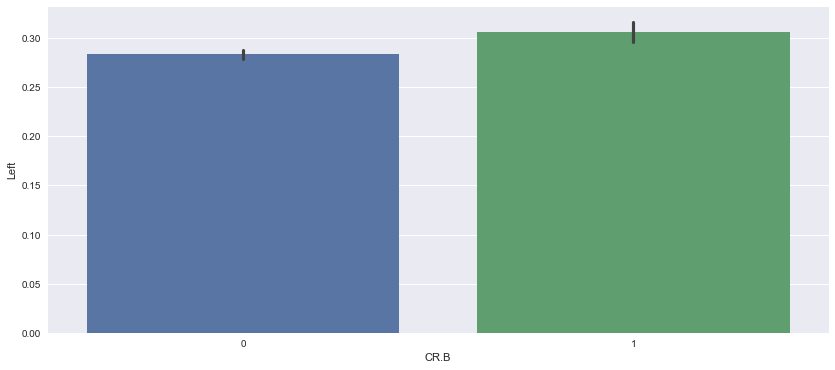

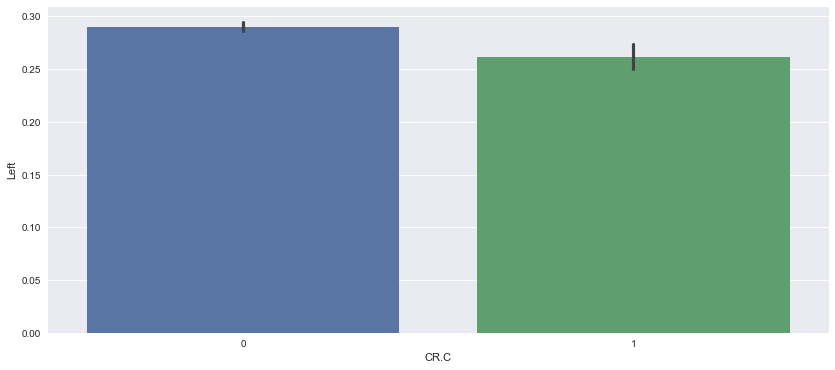

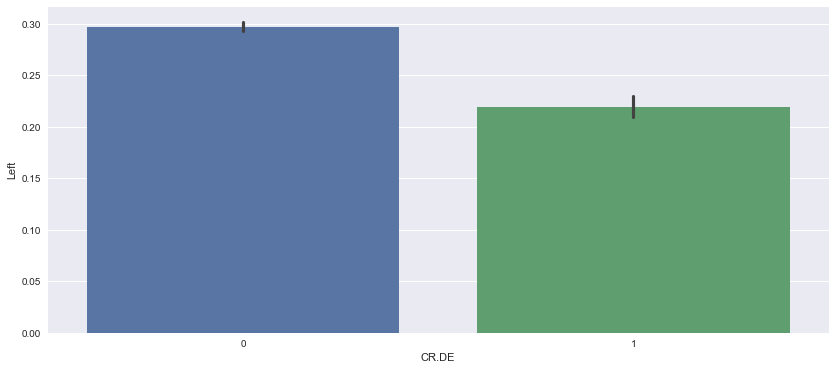

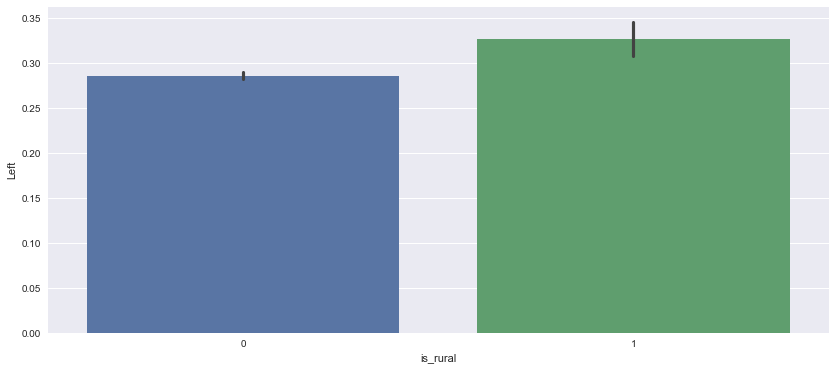

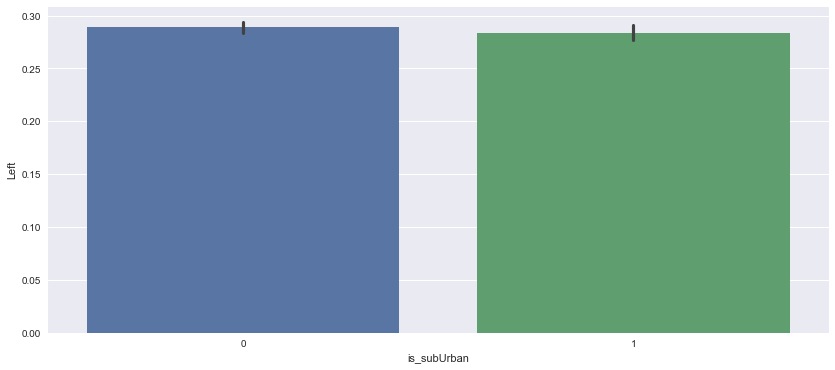

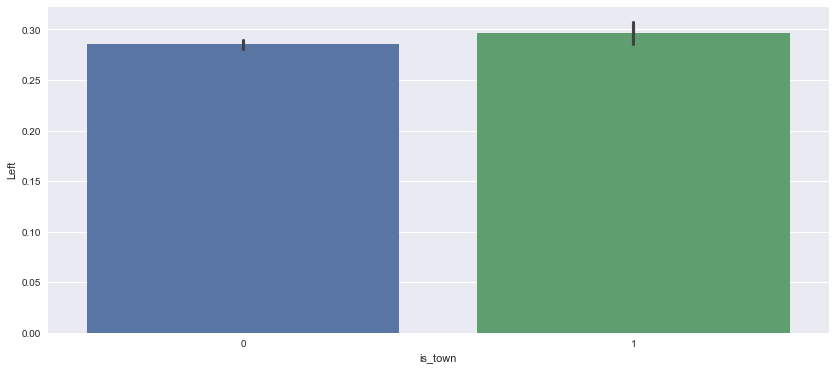

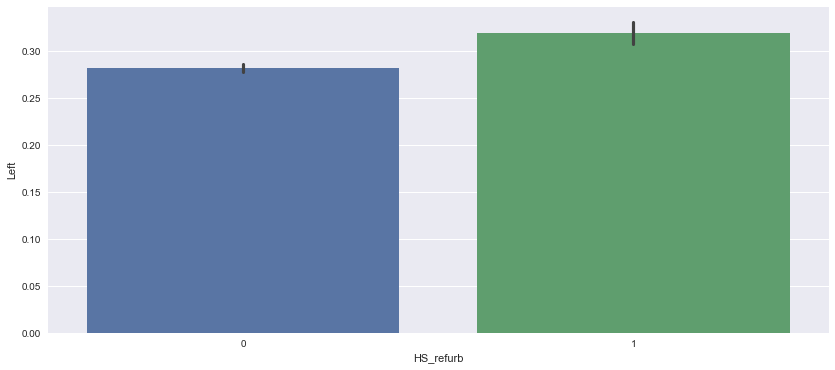

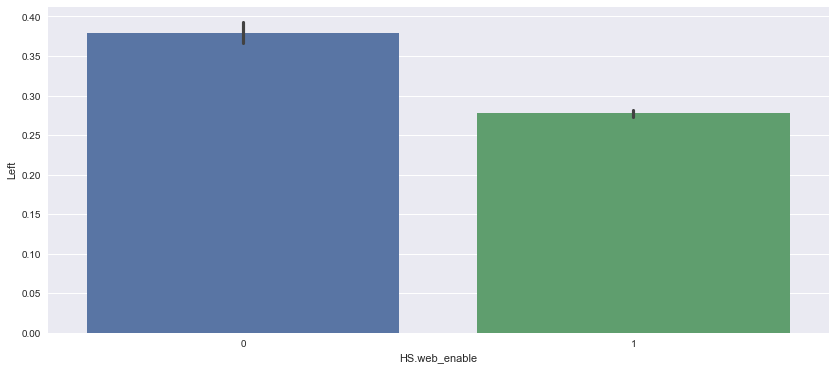

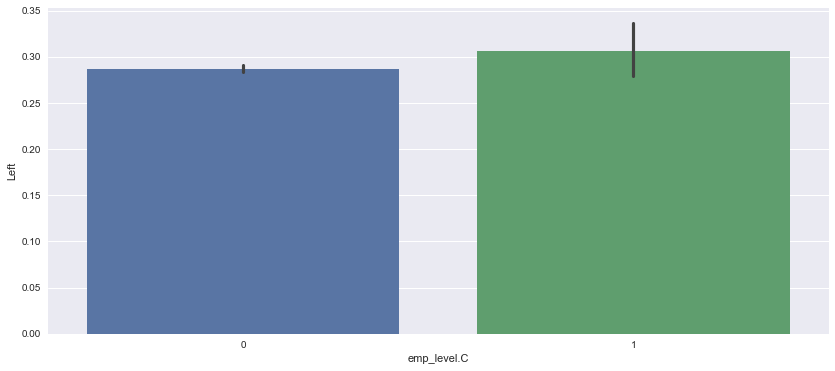

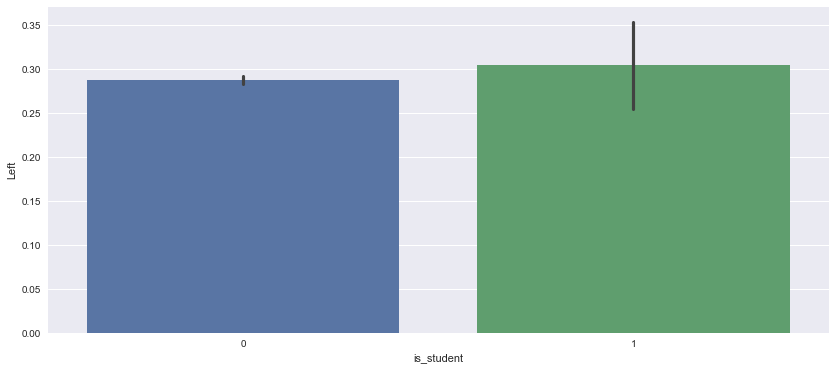

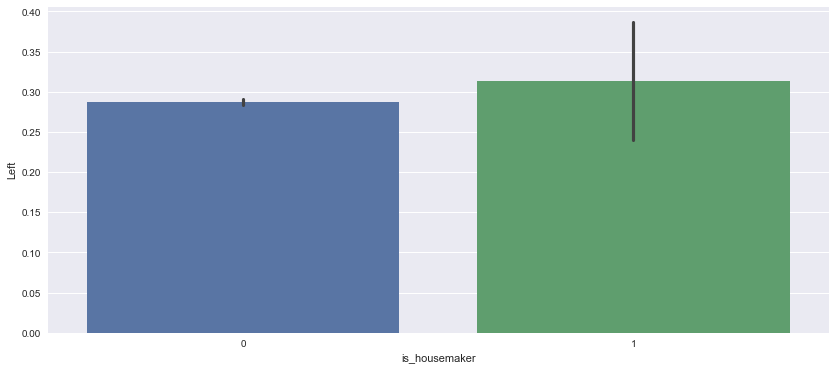

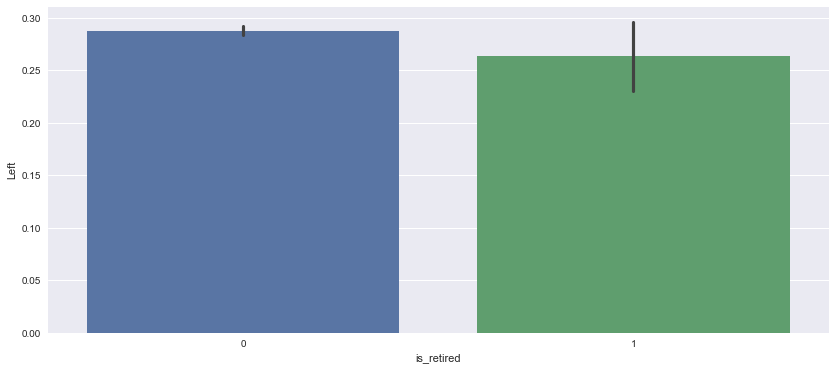

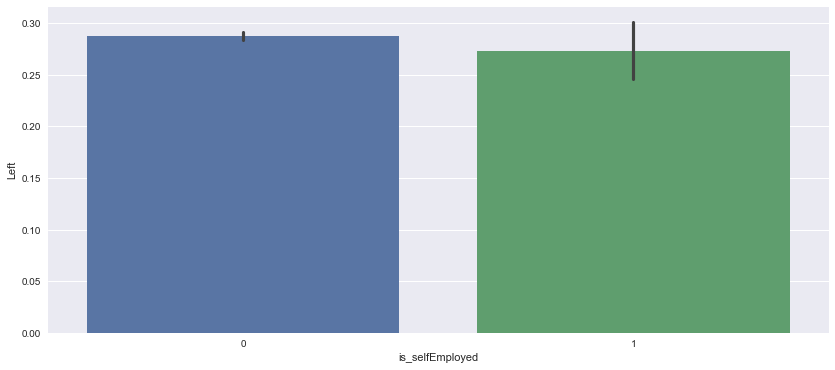

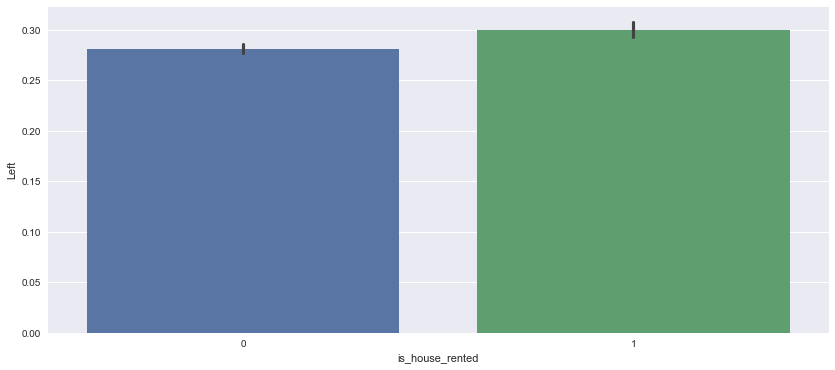

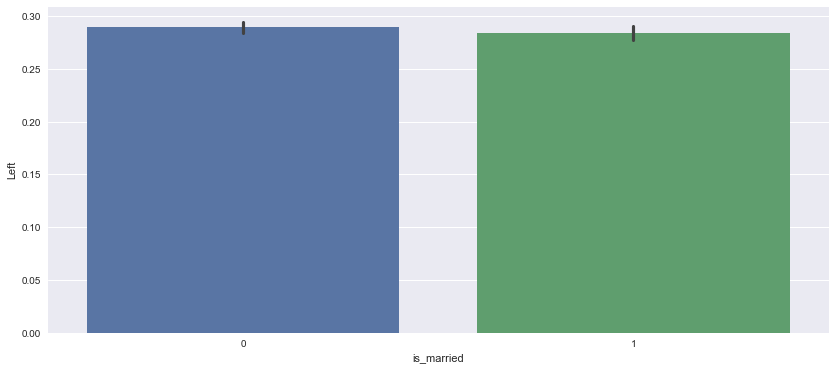

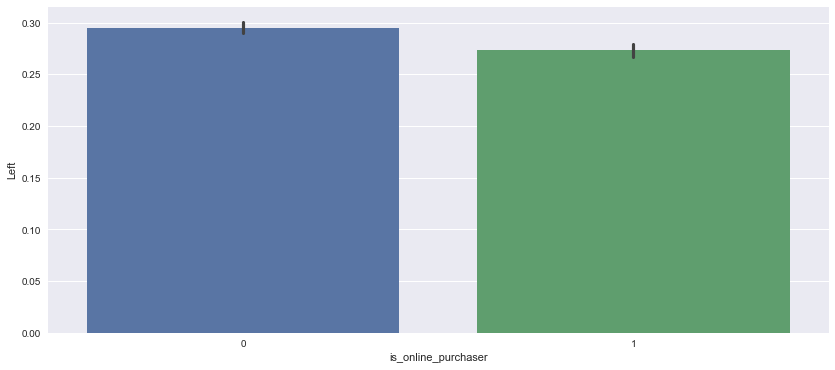

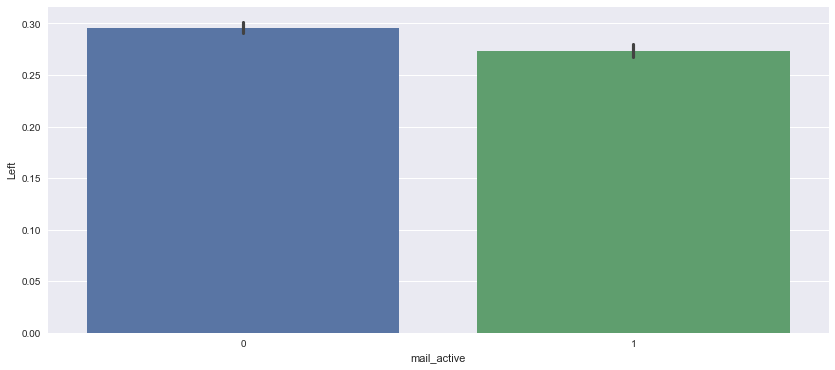

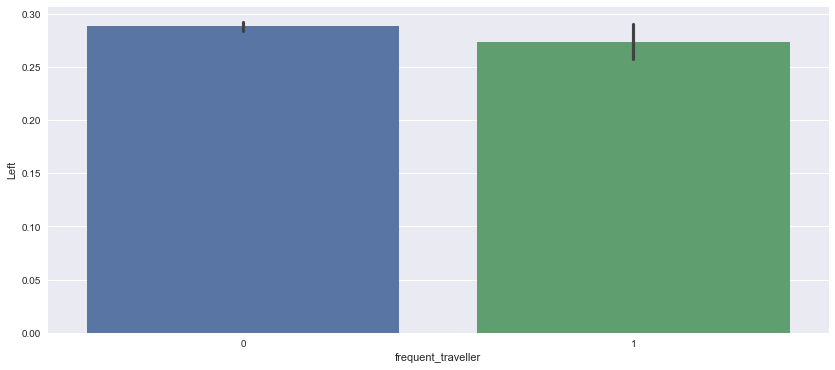

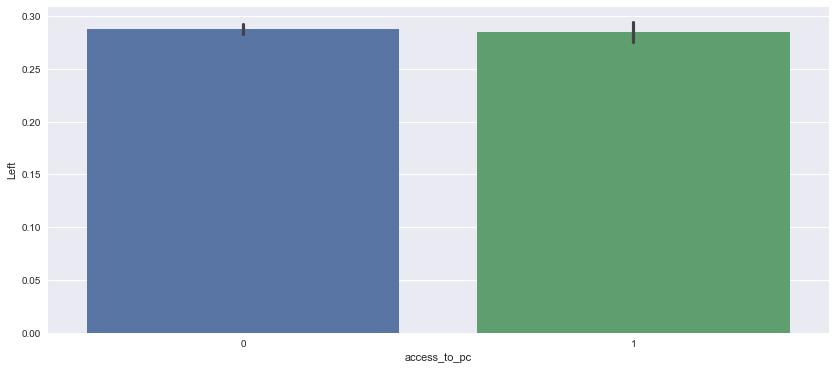

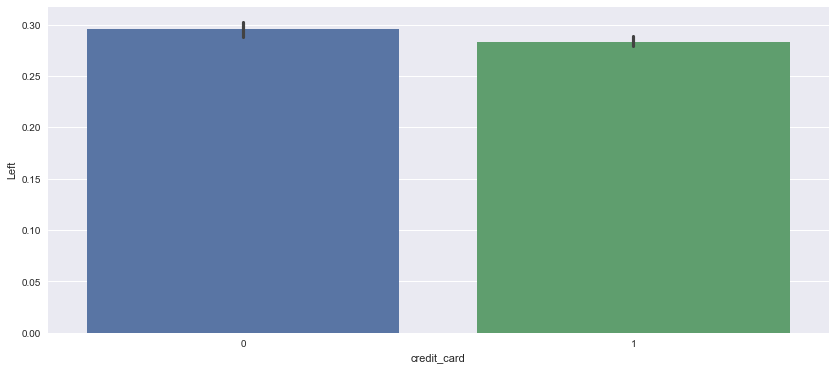

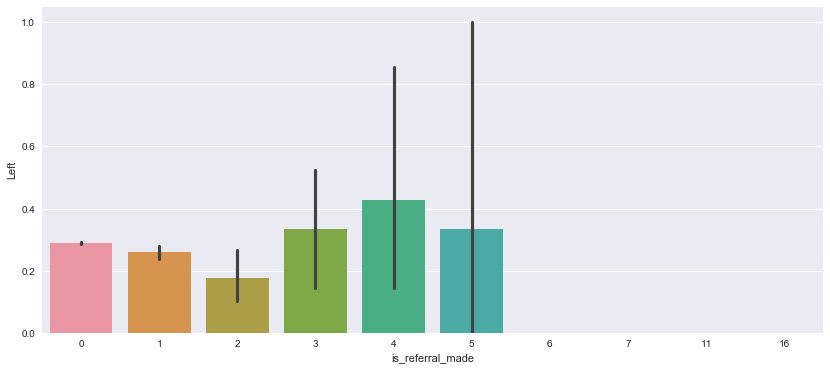

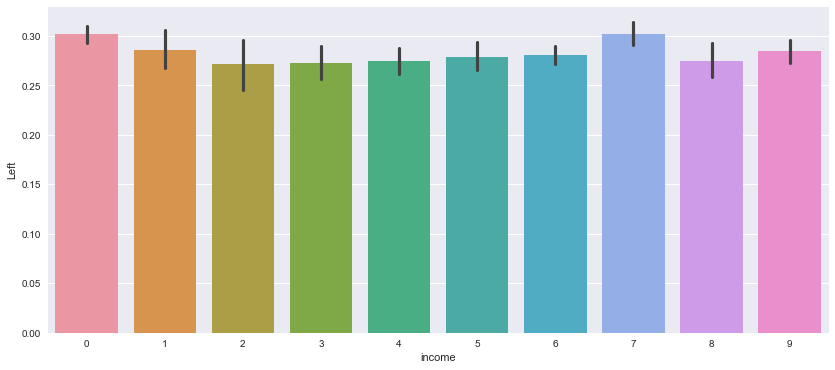

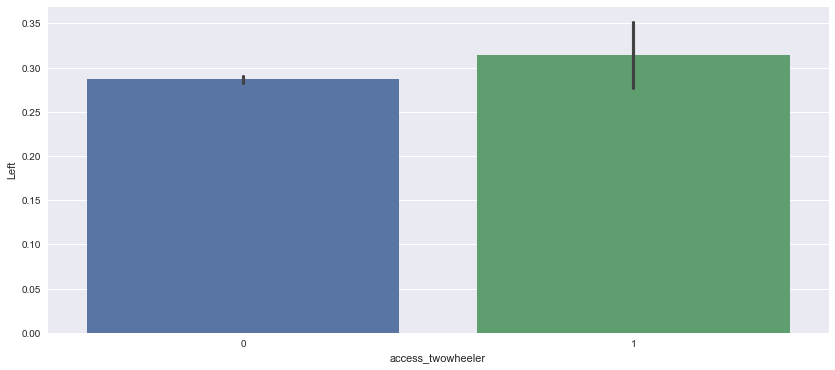

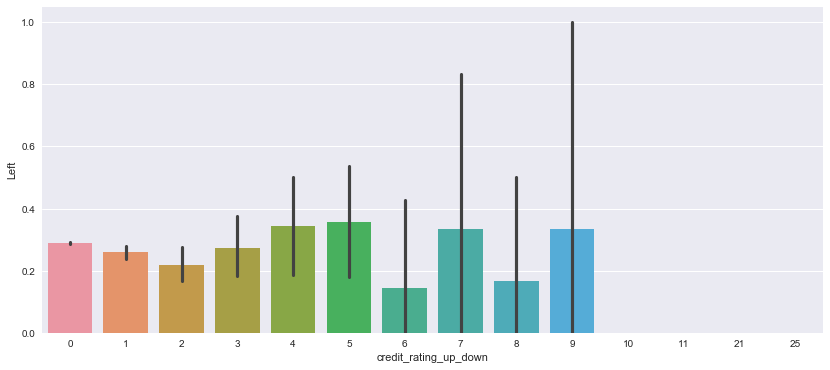

In [29]:
#displaying the relation beteween response variable and every categorical variables as bar graph
for i in cat:
    plt.figure(figsize=(14,6))
    sns.barplot(notnull.columns[i], 'Left', data=notnull)

In [30]:
#creating category for credit_rating_up_down column according to graph, combining categories which are behaving same

for i in range(0,48719):
    if(notnull.credit_rating_up_down.values[i]==8 or notnull.credit_rating_up_down.values[i]==6):
        notnull.credit_rating_up_down.values[i]=1
    else:
        notnull.credit_rating_up_down.values[i]=2

In [31]:
#creating category for income column according to graph, combining categories which are behaving same
for i in range(0,48719):
    if(notnull.income.values[i]==0 or notnull.income.values[i]==7):
        notnull.income.values[i]=1
    else:
        notnull.income.values[i]=2

In [32]:
##creating category for is_referral_made column according to graph, combining categories which are behaving same
for i in range(0,48719):
    if(notnull.is_referral_made.values[i]<=2):
        notnull.is_referral_made.values[i]=1
    elif(notnull.is_referral_made.values[i]>2):
        notnull.is_referral_made.values[i]=2

In [33]:
#creating category for model column according to graph, combining categories which are behaving same
for i in range(0,48719):
    if(notnull.model.values[i]==7 or notnull.model.values[i]>=9):
        notnull.model.values[i]=1
    elif(notnull.model.values[i]==1 or notnull.model.values[i]==8):
        notnull.model.values[i]=2
    elif(notnull.model.values[i]>=2 and notnull.model.values[i]<=6):
        notnull.model.values[i]=3

In [34]:
Counter(notnull.income)

Counter({1: 17343, 2: 31376})

In [35]:
#creating category for unique_sub column according to graph, combining categories which are behaving same
for i in range(0,48719):
    if(notnull.unique_sub.values[i]<=8):
        notnull.unique_sub.values[i]=1
    elif(notnull.unique_sub.values[i]>8 and notnull.unique_sub.values[i]<=12):
        notnull.unique_sub.values[i]=2
    elif(notnull.unique_sub.values[i]>12):
        notnull.unique_sub.values[i]=3

In [36]:
#creating category for active_sub column according to graph, combining categories which are behaving same
for i in range(0,48719):
    if(notnull.active_sub.values[i]<=7):
        notnull.active_sub.values[i]=1
    elif(notnull.active_sub.values[i]>7):
        notnull.active_sub.values[i]=2

In [37]:
#creating category for handset column according to graph, combining categories which are behaving same
for i in range(0,48719):
    if(notnull.handset.values[i]<=16):
        notnull.handset.values[i]=1
    elif(notnull.handset.values[i]>16):
        notnull.handset.values[i]=2

In [38]:
#dropping multicorrelated column from not null dataset, as notnull dataset will be used for further model building
notnull=notnull.drop('avg_overage_min_use',axis=1)
notnull=notnull.drop('mou_rec',axis=1)
notnull=notnull.drop('avg_peakvoice',axis=1)
notnull=notnull.drop('avg_off_peakvoice',axis=1)
notnull=notnull.drop('avg_drop_block',axis=1)
#notnull=notnull.drop('Left',axis=1)

In [39]:
#checking out the datatypes of the not null dataset
notnull.dtypes

gross_income                float64
avg_monthly_minute_usage    float64
repeating_charge            float64
avg_assisted_calls          float64
avg_roaming_calls           float64
per_change_min_use          float64
per_change_gross_profit     float64
avg_drop_voice_call         float64
ag_block_voice_call         float64
avg_unans_voice_call        float64
avg_custmore_care_call      float64
avg_threeway_call           float64
avg_outbound_voice_call     float64
avg_incalls                 float64
avg_call_forwarding         float64
avg_callwait                float64
months                        int64
unique_sub                    int64
active_sub                    int64
handset                       int64
model                         int64
equip_days                    int64
age                         float64
children                      int64
CR.A                          int64
CR.AA                         int64
CR.B                          int64
CR.C                        

In [40]:
#from the graph displayed above, we can conclude that following columns are not impacting the response variable, so better to
#drop them

notnull=notnull.drop('children',axis=1)
notnull=notnull.drop('CR.A',axis=1)
notnull=notnull.drop('CR.AA',axis=1)
notnull=notnull.drop('CR.B',axis=1)
notnull=notnull.drop('is_subUrban',axis=1)
notnull=notnull.drop('is_town',axis=1)
notnull=notnull.drop('emp_level.C',axis=1)
notnull=notnull.drop('is_student',axis=1)
notnull=notnull.drop('is_housemaker',axis=1)
notnull=notnull.drop('is_retired',axis=1)
notnull=notnull.drop('is_selfEmployed',axis=1)
notnull=notnull.drop('is_house_rented',axis=1)
notnull=notnull.drop('is_married',axis=1)
notnull=notnull.drop('is_online_purchaser',axis=1)
notnull=notnull.drop('mail_active',axis=1)
notnull=notnull.drop('frequent_traveller',axis=1)
notnull=notnull.drop('access_to_pc',axis=1)
notnull=notnull.drop('access_twowheeler',axis=1)

In [41]:
notnull=notnull.drop('credit_card',axis=1)

In [42]:
#few binary categories are there we are converting them into dummy variables
notnull['CR.DE']=pd.get_dummies(notnull['CR.DE'])

In [43]:
notnull.is_rural=pd.get_dummies(notnull.is_rural)

In [44]:
notnull.is_referral_made=pd.get_dummies(notnull.is_referral_made)
notnull['HS.web_enable']=pd.get_dummies(notnull['HS.web_enable'])

In [45]:
notnull.head()

,gross_income,avg_monthly_minute_usage,repeating_charge,avg_assisted_calls,avg_roaming_calls,per_change_min_use,per_change_gross_profit,avg_drop_voice_call,ag_block_voice_call,avg_unans_voice_call,...,age,CR.C,CR.DE,is_rural,HS_refurb,HS.web_enable,is_referral_made,income,credit_rating_up_down,Left
0,44.08,430.00,50.07,0.00,0.0,-47.00,-4.09,0.00,0.00,0.00,...,62.0,0,1,1,0,0,1,2,2,1
1,30.50,86.00,30.00,0.50,0.0,-46.00,-0.49,1.33,0.00,5.00,...,0.0,1,1,1,0,0,1,1,2,0
2,30.65,65.50,29.99,0.00,0.0,4.50,-0.66,0.00,2.00,6.67,...,32.0,0,1,1,0,0,1,2,2,1
3,34.99,425.25,44.99,0.00,0.0,34.75,0.00,5.00,1.33,34.00,...,32.0,0,1,1,0,0,1,2,2,1
4,170.75,1657.25,61.69,1.73,0.0,-1654.25,-178.98,14.67,1.00,159.67,...,0.0,0,0,1,0,0,1,1,2,0


In [46]:
notnull=notnull.drop('age',axis=1)

In [47]:
#the data set is imbalanced, so we need to balance it by under sampling. So we are creating two datasets, one with all zeros 
# and another with all ones.

notnull0=notnull[notnull.Left==0]
notnull1=notnull[notnull.Left==1]

In [48]:
#checking how many zeros and how many ones are in the dataset
Counter(notnull.Left)

Counter({0: 34725, 1: 13994})

In [49]:
#since we have more zeros than one, we need to undersample zeros, so we are selecting the same numbers of zeros like ones
notnull0=notnull0.sample(n=13994)

In [50]:
#joining two datasets
balancedData=notnull0.append(notnull1)

In [51]:
#mixing up
balancedData=balancedData.sample(frac=1).reset_index(drop=True)

In [52]:
notnull.head()

,gross_income,avg_monthly_minute_usage,repeating_charge,avg_assisted_calls,avg_roaming_calls,per_change_min_use,per_change_gross_profit,avg_drop_voice_call,ag_block_voice_call,avg_unans_voice_call,...,equip_days,CR.C,CR.DE,is_rural,HS_refurb,HS.web_enable,is_referral_made,income,credit_rating_up_down,Left
0,44.08,430.00,50.07,0.00,0.0,-47.00,-4.09,0.00,0.00,0.00,...,243,0,1,1,0,0,1,2,2,1
1,30.50,86.00,30.00,0.50,0.0,-46.00,-0.49,1.33,0.00,5.00,...,736,1,1,1,0,0,1,1,2,0
2,30.65,65.50,29.99,0.00,0.0,4.50,-0.66,0.00,2.00,6.67,...,634,0,1,1,0,0,1,2,2,1
3,34.99,425.25,44.99,0.00,0.0,34.75,0.00,5.00,1.33,34.00,...,305,0,1,1,0,0,1,2,2,1
4,170.75,1657.25,61.69,1.73,0.0,-1654.25,-178.98,14.67,1.00,159.67,...,132,0,0,1,0,0,1,1,2,0


In [53]:
balancedData.head()

,gross_income,avg_monthly_minute_usage,repeating_charge,avg_assisted_calls,avg_roaming_calls,per_change_min_use,per_change_gross_profit,avg_drop_voice_call,ag_block_voice_call,avg_unans_voice_call,...,equip_days,CR.C,CR.DE,is_rural,HS_refurb,HS.web_enable,is_referral_made,income,credit_rating_up_down,Left
0,31.11,199.50,19.99,0.25,0.00,45.50,4.13,0.00,6.00,1.67,...,398,0,1,1,0,0,1,2,2,1
1,36.06,166.00,29.99,0.74,0.00,-44.00,-6.58,1.67,6.33,13.00,...,521,0,1,1,0,0,1,2,2,0
2,57.87,1137.75,8.23,2.23,0.29,2.25,-5.48,5.00,2.00,39.00,...,391,0,1,1,0,0,1,2,2,1
3,10.00,311.00,10.00,0.00,0.00,29.00,0.00,1.33,0.67,7.00,...,486,0,1,1,0,0,1,1,2,1
4,32.61,206.00,39.99,0.99,1.63,139.00,1.51,3.00,0.00,6.67,...,393,0,1,1,0,0,1,1,2,0


In [54]:
#importing important packages for model validation

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [55]:
balancedData.head()

,gross_income,avg_monthly_minute_usage,repeating_charge,avg_assisted_calls,avg_roaming_calls,per_change_min_use,per_change_gross_profit,avg_drop_voice_call,ag_block_voice_call,avg_unans_voice_call,...,equip_days,CR.C,CR.DE,is_rural,HS_refurb,HS.web_enable,is_referral_made,income,credit_rating_up_down,Left
0,31.11,199.50,19.99,0.25,0.00,45.50,4.13,0.00,6.00,1.67,...,398,0,1,1,0,0,1,2,2,1
1,36.06,166.00,29.99,0.74,0.00,-44.00,-6.58,1.67,6.33,13.00,...,521,0,1,1,0,0,1,2,2,0
2,57.87,1137.75,8.23,2.23,0.29,2.25,-5.48,5.00,2.00,39.00,...,391,0,1,1,0,0,1,2,2,1
3,10.00,311.00,10.00,0.00,0.00,29.00,0.00,1.33,0.67,7.00,...,486,0,1,1,0,0,1,1,2,1
4,32.61,206.00,39.99,0.99,1.63,139.00,1.51,3.00,0.00,6.67,...,393,0,1,1,0,0,1,1,2,0


In [56]:
#creating trainset and test set for cross validation, let's keep 25 percent data for test
xtrain,ytrain,xtest,ytest=train_test_split(balancedData.iloc[:,0:29],balancedData['Left'],test_size=0.25,random_state=123)

In [57]:
#random forest importing
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf=RandomForestClassifier()

In [59]:
#finding parameters for parameter tuning
m=50
for i in range (0,10):
        rf=RandomForestClassifier(max_depth=8,n_estimators=m)
        rf_cv_score=cross_val_score(estimator=rf,X=xtrain,y=xtest,cv=5)
        print rf_cv_score.mean()
        m=m+1

0.603876945638
0.606306730961
0.604830461296
0.606544882902
0.605878216349
0.606878341014
0.606544724021
0.606878477198
0.607402479561
0.605687240849


In [60]:
#creating random forest model
rf=RandomForestClassifier(max_depth=8,n_estimators=55)

In [61]:
#importing library to check accuracy
from sklearn import metrics

In [62]:
#fitting data into random forest data model
rf.fit(balancedData.iloc[:,0:29],balancedData['Left'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=55, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
#storing predicted value in variable
p=rf.predict(ytrain)

In [64]:
#checking the accuracy
metrics.accuracy_score(p,ytest)

0.63641560668858077

In [65]:
#checking cohen kappa score
metrics.cohen_kappa_score(p,ytest)

0.27627959457207896

In [66]:
#importing and building knn classifiers
from sklearn import neighbors
modelKnn=neighbors.KNeighborsClassifier()

In [67]:
#finding parameters for parameter tuning
m=170
for i in range(0,10):
    modelKnn=neighbors.KNeighborsClassifier(n_neighbors=m)
    knn_cv_score=cross_val_score(estimator=modelKnn,X=xtrain,y=xtest,cv=5)
    print knn_cv_score.mean()
    m=m+5

0.583487417128
0.583820920635
0.58301099976
0.583916136017
0.582010625424
0.584249662221
0.584106317109
0.583248992819
0.581962949641
0.584154129076


In [68]:
#building knn model
modelKnn=neighbors.KNeighborsClassifier(n_neighbors=180)

In [69]:
#importing library for logistic regression
from sklearn import linear_model

In [70]:
#building logistic regression model
modelLogit=linear_model.LogisticRegression(penalty='l1')

In [71]:
#checking the accuracy for the model
rf_cv_score=cross_val_score(estimator=modelLogit,X=xtrain,y=xtest,cv=5)
rf_cv_score.mean()

0.57643748415086637

In [72]:
#importing library for gradiant boosting
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
#tuning parameter for gradiant boost
m=4
for i in range(0,3):
    modelGradBoost=GradientBoostingClassifier(max_depth=5)
    svm_cv_score=cross_val_score(estimator=modelGradBoost,X=xtrain,y=xtest,cv=5)
    print svm_cv_score.mean()
    m=m+1

0.615357957347
0.615167367703
0.615882050499


In [74]:
#building gradiant boosting model
modelGradBoost=GradientBoostingClassifier(max_depth=5)

In [75]:
#checking accuracy
cross_val_score(estimator=modelGradBoost,X=xtrain,y=xtest,cv=5)

array([ 0.62086211,  0.61538462,  0.61919505,  0.60662378,  0.61567787])

In [76]:
#importing library for nural network
from sklearn.neural_network import MLPClassifier
modelAnn = MLPClassifier()

In [77]:
#checking accuracy 
cross_val_score(estimator=modelAnn,X=xtrain,y=xtest,cv=5)

array([ 0.5525125 ,  0.52750655,  0.576804  ,  0.51798904,  0.54729569])

In [78]:
#droping columns from test dataset like train

test=test.drop('children',axis=1)
test=test.drop('CR.A',axis=1)
test=test.drop('CR.AA',axis=1)
test=test.drop('CR.B',axis=1)
test=test.drop('is_subUrban',axis=1)
test=test.drop('is_town',axis=1)
test=test.drop('emp_level.C',axis=1)
test=test.drop('is_student',axis=1)
test=test.drop('is_housemaker',axis=1)
test=test.drop('is_retired',axis=1)
test=test.drop('is_selfEmployed',axis=1)
test=test.drop('is_house_rented',axis=1)
test=test.drop('is_married',axis=1)
test=test.drop('is_online_purchaser',axis=1)
test=test.drop('mail_active',axis=1)
test=test.drop('frequent_traveller',axis=1)
test=test.drop('access_to_pc',axis=1)
test=test.drop('access_twowheeler',axis=1)
test=test.drop('age',axis=1)

In [107]:
#missing data in test set
total=test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Total>0]

,Total,Percent
handset,1,0.000048


In [108]:
test=test.drop('handset',axis=1)

In [80]:
#converting into dummy variables

test['CR.DE']=pd.get_dummies(test['CR.DE'])
test.is_rural=pd.get_dummies(test.is_rural)
test.is_referral_made=pd.get_dummies(test.is_referral_made)
test['HS.web_enable']=pd.get_dummies(test['HS.web_enable'])

In [81]:
#putting median values for missing data

test.per_change_min_use.fillna(test.per_change_min_use.median(), inplace=True)

In [82]:
#putting median values for missing data

test.per_change_gross_profit.fillna(test.per_change_gross_profit.median(), inplace=True)
test.gross_income.fillna(test.gross_income.median(), inplace=True)
test.avg_monthly_minute_usage.fillna(test.avg_monthly_minute_usage.median(), inplace=True)
test.repeating_charge.fillna(test.repeating_charge.median(), inplace=True)
test.avg_assisted_calls.fillna(test.avg_assisted_calls.median(), inplace=True)
test.avg_roaming_calls.fillna(test.avg_roaming_calls.median(), inplace=True)
test.equip_days.fillna(test.equip_days.median(), inplace=True)
test.model.fillna(test.model.median(), inplace=True)

In [83]:
#test.handset.fillna(test.handset.median(), inplace=True)

In [84]:
#creating categorical variables by combining two or more categories


for i in range(0,test.active_sub.count()):
    if(test.credit_rating_up_down.values[i]==8 or test.credit_rating_up_down.values[i]==6):
        test.credit_rating_up_down.values[i]=1
    else:
        test.credit_rating_up_down.values[i]=2

for i in range(0,test.active_sub.count()):
    if(test.income.values[i]==0 or test.income.values[i]==7):
        test.income.values[i]=1
    else:
        test.income.values[i]=2

for i in range(0,test.active_sub.count()):
    if(test.is_referral_made.values[i]<=2):
        test.is_referral_made.values[i]=1
    elif(test.is_referral_made.values[i]>2):
        test.is_referral_made.values[i]=2


for i in range(0,test.active_sub.count()):
    if(test.model.values[i]==7 or test.model.values[i]>=9):
        test.model.values[i]=1
    elif(test.model.values[i]==1 or test.model.values[i]==8):
        test.model.values[i]=2
    elif(test.model.values[i]>=2 and test.model.values[i]<=6):
        test.model.values[i]=3

for i in range(0,test.active_sub.count()):
    if(test.unique_sub.values[i]<=8):
        test.unique_sub.values[i]=1
    elif(test.unique_sub.values[i]>8 and test.unique_sub.values[i]<=12):
        test.unique_sub.values[i]=2
    elif(test.unique_sub.values[i]>12):
        test.unique_sub.values[i]=3


for i in range(0,test.active_sub.count()):
    if(test.active_sub.values[i]<=7):
        test.active_sub.values[i]=1
    elif(test.active_sub.values[i]>7):
        test.active_sub.values[i]=2


for i in range(0,test.active_sub.count()):
    if(test.handset.values[i]<=16):
        test.handset.values[i]=1
    elif(test.handset.values[i]>16):
        test.handset.values[i]=2


In [85]:
test.head()

,gross_income,avg_monthly_minute_usage,repeating_charge,avg_assisted_calls,avg_roaming_calls,per_change_min_use,per_change_gross_profit,avg_drop_voice_call,ag_block_voice_call,avg_unans_voice_call,...,equip_days,CR.C,CR.DE,is_rural,HS_refurb,HS.web_enable,credit_card,is_referral_made,income,credit_rating_up_down
0,116.08,1000.50,34.98,1.98,5.2,-149.50,-40.88,19.67,2.00,25.67,...,5.0,0,0,1,0,0,1,1,2,2
1,65.99,904.75,54.99,0.25,0.0,189.25,-21.00,6.00,5.00,29.33,...,183.0,0,1,1,0,0,1,1,2,2
2,76.65,361.75,38.12,0.00,0.0,-361.75,73.35,17.67,11.33,71.00,...,189.0,0,1,0,1,0,1,1,2,2
3,73.81,498.50,33.16,0.00,0.0,-430.50,76.19,21.33,35.33,43.33,...,182.0,1,1,1,1,0,0,1,1,2
4,25.65,129.00,9.74,0.00,0.0,-90.00,-15.65,0.67,6.00,11.33,...,308.0,0,1,1,1,0,1,1,2,2


In [86]:
balancedData.tail()

,gross_income,avg_monthly_minute_usage,repeating_charge,avg_assisted_calls,avg_roaming_calls,per_change_min_use,per_change_gross_profit,avg_drop_voice_call,ag_block_voice_call,avg_unans_voice_call,...,equip_days,CR.C,CR.DE,is_rural,HS_refurb,HS.web_enable,is_referral_made,income,credit_rating_up_down,Left
27983,100.56,1235.75,69.99,1.49,1.71,685.25,-20.17,19.67,4.00,87.00,...,27,1,1,1,0,0,1,2,2,0
27984,55.08,877.50,69.99,0.50,0.00,-196.50,-5.09,3.00,14.33,45.67,...,537,0,1,1,0,0,1,1,2,0
27985,50.25,452.00,50.00,0.25,0.00,-38.00,-0.25,7.67,10.67,12.67,...,522,0,1,1,1,1,1,2,2,0
27986,42.40,270.75,29.99,0.00,0.00,101.25,30.57,0.00,6.00,10.33,...,358,0,1,1,0,0,1,1,2,0
27987,65.69,1429.00,59.99,0.00,0.00,329.00,47.10,8.33,6.33,23.33,...,139,0,0,1,0,0,1,2,2,0


In [87]:
test=test.drop('credit_card',axis=1)

In [88]:
#fitting knn model
modelKnn.fit(balancedData.iloc[:,0:29],balancedData['Left'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=180, p=2,
           weights='uniform')

In [89]:
#fitting gradiant boosting model
modelGradBoost.fit(balancedData.iloc[:,0:29],balancedData['Left'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [90]:
#fitting logistic model
modelLogit.fit(balancedData.iloc[:,0:29],balancedData['Left'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
#fitting nural net model
modelAnn.fit(balancedData.iloc[:,0:29],balancedData['Left'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [92]:
#importing extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier

In [93]:
#building extra tree cassifier
modelExtra=ExtraTreesClassifier()

In [94]:
#finding paremeters for parameter tuning
m=8
for i in range(0,6):
    modelExtra=ExtraTreesClassifier(min_samples_split=10,min_samples_leaf=m)
    knn_cv_score=cross_val_score(estimator=modelExtra,X=xtrain,y=xtest,cv=5)
    print knn_cv_score.mean()
    m=m+1

0.592444880763
0.589060921559
0.594349460765
0.589633802663
0.592444563
0.591920447151


In [95]:
#building extratree model
modelExtra=ExtraTreesClassifier(min_samples_split=10,min_samples_leaf=10)

In [96]:
#fitting extra tree model
modelExtra.fit(balancedData.iloc[:,0:29],balancedData['Left'])

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [97]:
#creating stacking ensembles
from brew.base import Ensemble, EnsembleClassifier
from brew.stacking.stacker import EnsembleStack, EnsembleStackClassifier
from brew.combination.combiner import Combiner

C:\Users\kallol\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [98]:
#selecting models
clf1=rf
clf2=modelGradBoost
clf3=modelExtra

In [99]:
ensemble = Ensemble([clf1, clf2, clf3])
eclf = EnsembleClassifier(ensemble=ensemble, combiner=Combiner('mean'))

In [100]:
import sklearn

In [101]:
#creating and adding layers
layer_1 = Ensemble([clf1, clf2, clf3])
layer_2 = Ensemble([sklearn.clone(clf2)])

stack = EnsembleStack(cv=3)

stack.add_layer(layer_1)
stack.add_layer(layer_2)


sclf = EnsembleStackClassifier(stack)

In [102]:
#fitting stacked model
sclf.fit(np.array(balancedData.iloc[:,0:29]),np.array(balancedData['Left']))

In [103]:
#adding adaboost library
from sklearn.ensemble import AdaBoostClassifier

In [104]:
#building model
modelAda=AdaBoostClassifier()

In [105]:
#parameter tuning
m=1.2
for i in range(0,6):
    modelAda=AdaBoostClassifier(learning_rate=m)
    knn_cv_score=cross_val_score(estimator=modelAda,X=xtrain,y=xtest,cv=5)
    print knn_cv_score.mean()
    m=m+0.1

0.608593193871
0.608926651983
0.611356528095
0.607259020962
0.605829269515
0.602066082993


In [109]:
#test prediction by random forest
rfOutput=rf.predict_proba(test.iloc[:,0:29])

In [110]:
#test prediction by knn classifier
knnOutput=modelKnn.predict_proba(test.iloc[:,0:29])

In [112]:
#test prediction by nuran net
annOutput=modelAnn.predict_proba(test.iloc[:,0:29])

In [113]:
#test prediction by gradiant boosting
gradBoostOutput=modelGradBoost.predict_proba(test.iloc[:,0:29])

In [114]:
#test prediction by logistic regression
logisticOutput=modelLogit.predict_proba(test.iloc[:,0:29])

In [115]:
#test prediction by extra tree model
ExtraOutput=modelExtra.predict_proba(test.iloc[:,0:29])

In [116]:
#test prediction by stacked ensemble model
stackedOutput=sclf.predict_proba(test.iloc[:,0:29])

In [117]:
#averaging the output values and storing it
z=[]
for i in range(0,test.active_sub.count()):
    p=(rfOutput[i]+gradBoostOutput[i]+ExtraOutput[i])/3
    z.append(p)

In [118]:
#storing the output value in a dataframe
y=[]
for i in range(0,test.active_sub.count()):
    y.append(1-stackedOutput[i][0])

In [119]:
#fetching the data again to create new file
store=pd.read_csv("C:/Users/kallol/Desktop/Kaggle/Hackathon/test.csv")

In [120]:
#empty list
result=[]

In [121]:
#converting the list into empty dataframe
result=pd.DataFrame(result)

In [122]:
#creating column
result['Customer_Id']=store.Customer_Id

In [123]:
result['Left']=y

In [124]:
#creating the csv file of result
#delete the newly formed column of the excel sheet and send it
result.to_csv('res10.csv')